# 使用真实数据 Working with Real Data

详见课程笔记

# 观察大局 Look at the Big Picture

详见课程笔记

# 获取数据 Get the data

## 下载数据  Download the Data

获取压缩文件`housing.tgz`，解压提取CSV文件

调用`fetch_housing_data()`函数会将`housing.csv`文件解压到指定目录。

In [1]:
import os
import tarfile
import urllib

download_Root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_Path = os.path.join("datasets", "housing")
housing_URL = download_Root + "datasets/housing/housing.tgz"

def fetching_housing_data(url, path):
    os.makedirs(housing_Path, exist_ok=True)
    tgz_path = os.path.join(housing_Path, 'housing.tgz')
    
    # 下载压缩文件 
    # urlretrieve():直接将远程数据下载到本地。
    urllib.request.urlretrieve(url=housing_URL, filename=tgz_path)
    
    # 提取CVS文件
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_Path)
    housing_tgz.close()

In [2]:
fetching_housing_data(url=housing_URL, path=housing_Path)

使用`pandas`加载数据

In [3]:
import pandas as pd
def load_housing_data(path):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

## 快速查看数据结构 Take a Quick Look at the Data Structure

1. `head( )`展示前五行数据

In [4]:
housing = load_housing_data(path=housing_Path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2. `info( )` 获取数据集的简单描述

In [5]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


我们注意到：

- `total_bedrooms        20433 non-null float64`

 意味着有207个区域确实特征（共有20 640个实例）


- `ocean_proximity       20640 non-null object`
  
  该列的数据是重复的 使用`value_counts()`方法查看有多少种分类

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

3. `describe( )` 显示数据属性的摘要

In [7]:
housing.describe()  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


4. `hist( )` 绘制数据属性的直方图

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

<Figure size 2000x1500 with 9 Axes>

我们观察到部分数据
1. 使用了预处理的属性，并且缩放程度各不相同
2. 设定了上限
3. 许多直方图表现出`重尾`（P56）

## 创建测试集 Create a Test Set

### 纯随机抽样 Random Sampling

1. 利用设置随机数种子生成相同的随机索引

In [9]:
import numpy as np

np.random.seed(42)

In [10]:
def split_train_test(data, ratio):
    # permutation() 随机排列返回一个序列   len(data) = 20640
    shuffied_indices = np.random.permutation(len(data))
    TEST_SET_size = int(len(data) * ratio)  # 20640 * 20%  取整
    
    TEST_SET = shuffied_indices[:TEST_SET_size]  # 前20%的索引
    TRAIN_SET = shuffied_indices[TEST_SET_size:]   # 后80%的索引
    
    return data.iloc[TRAIN_SET], data.iloc[TEST_SET]    

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set),len(test_set)

(16512, 4128)

2. 使用`行索`引作为ID,计算其哈希值，实现稳定的训练测试分割

In [12]:
housing_id = housing.reset_index()  # 添加index列

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):  # 哈希运算
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, ratio, col):
    ids = data[col]
    TEST_SET = ids.apply(lambda id: test_set_check(id, ratio))
    return data.loc[~TEST_SET], data.loc[TEST_SET]  # ~ 取反

In [14]:
train_set, test_set = split_train_test_by_id(housing_id, 0.2, "index")
len(train_set),len(test_set)

(16512, 4128)

3. 使用`经纬度`引作为ID

In [15]:
housing_id['id'] = housing['longitude']*1000 + housing["latitude"]   # 添加index列

In [16]:
housing_id['id'].head()

0   -122192.12
1   -122182.14
2   -122202.15
3   -122212.15
4   -122212.15
Name: id, dtype: float64

In [17]:
train_set, test_set = split_train_test_by_id(housing_id, 0.2, "id")
len(train_set),len(test_set)

(16322, 4318)

4. 利用`Scikit-Learn`中的`train_test_split()`函数

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2,
                                       random_state=42
                                      )

In [19]:
len(train_set),len(test_set)

(16512, 4128)

### 分层抽样 Stratified Sampling

以收入中位数为例，我们需要能够代表整个数据集中各种不同类型的收入。

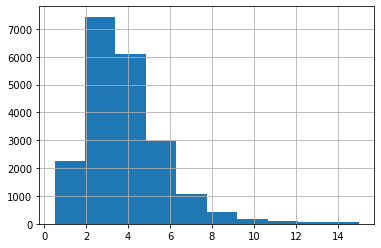

In [20]:
housing["median_income"].hist()
plt.show()

观察可知，收入中位数集中在1.5~6之间。

我们可以创建5个收入类别属性，每一层都要有足够数量的实例。

In [21]:
# pd.cut() 数据分箱
housing['income_cat'] = pd.cut(x=housing['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # np.inf 无穷大
                               labels=[1, 2, 3, 4, 5]
                              )

> matplotlib使用中文字体的方法

In [22]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./Fonts/SourceHanSerifSC-Medium.otf', size=15)

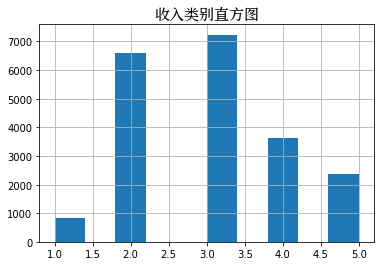

In [23]:
housing['income_cat'].hist()
plt.title('收入类别直方图', fontproperties=my_font)
plt.show()

根据抽样类别进行分层抽样

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
sklearn_split = StratifiedShuffleSplit(n_splits=1,    
                                       test_size=0.2,
                                       random_state=42
                                      )
# n_splits：将训练数据分成train/test对的组数

In [26]:
for train_set, test_set in sklearn_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_set]
    strat_test_set = housing.loc[test_set]

测试集中收入类别比例分配

In [27]:
(strat_test_set["income_cat"].value_counts() / len(strat_test_set)) *100

3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: income_cat, dtype: float64

比较在三种不同的数据集中收入类别比例分布以及抽样误差比较

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 利用Scikit-Learn进行纯随机抽样 详见In [18]
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),            # 完整数据集
    "Stratified": income_cat_proportions(strat_test_set),  # 分层抽样的测试集
    "Random": income_cat_proportions(test_set),            # 纯随机抽样的测试集
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


我们可以观察到Stratified抽样的测试集中的比例分布与Overall的数据集中分布几乎一致，而Random抽样的测试集结果则是有偏的。

将恢复数据到原样

In [30]:
strat_test_set.drop("income_cat", axis=1, inplace=True)
strat_train_set.drop("income_cat", axis=1, inplace=True)

# 从数据探索和可视化中获取洞见 Discover and visualize the data to gain insights

创建副本，而不损害训练集

In [31]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## 将地理数据可视化 Visualizing Geographical Data

建立一个各区域的分布图，以便于可视化数据。

将α设置为为0.1，可以更突出高密度数据点的位置。

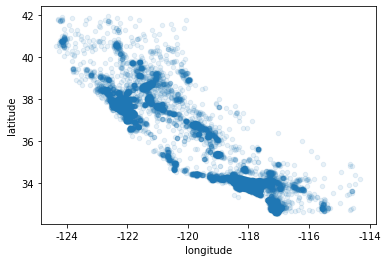

In [32]:
housing.plot(kind='scatter', 
             x='longitude',
             y='latitude',
             alpha = 0.1
            )
plt.show()

进一步，我们可以将房价与地理位置、人口密度的关系相联系

每个圆的半径大小代表了每一个区域的人口数量（S），颜色代表价格（C）。

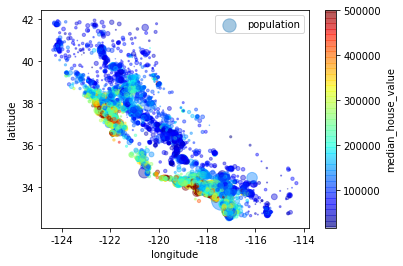

In [33]:
housing.plot(kind='scatter', 
             x='longitude',
             sharex=False,   # 修复了显示错误（未显示X轴值和图例）
             y='latitude',
             alpha = 0.4,
             
             s=housing['population']/100, label='population',
             
             c='median_house_value', cmap=plt.get_cmap("jet"),
             
             #figsize=(10,7)
            )
plt.show()

加州房价红色昂贵，蓝色便宜，较大的圆圈表示人口较多的地方

为了更加清晰的表示地理位置，我们将添加加州地图作为图表背景

In [34]:
import matplotlib.image as mpimg
images_path = os.path.join('.', "images", "end_to_end_project")
california_img=mpimg.imread(os.path.join(images_path, 'california.png'))

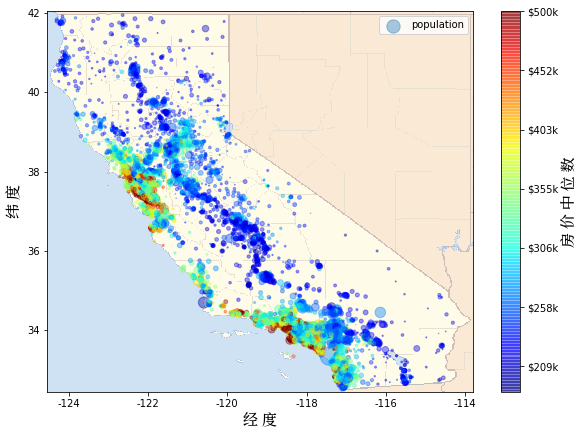

In [35]:
ax = housing.plot(kind='scatter', x='longitude',
             sharex=False, y='latitude',
             alpha = 0.4,s=housing['population']/100, label='population',
             c='median_house_value', cmap=plt.get_cmap("jet"),figsize=(10,7),
             colorbar=False
            )
# 加州地图
plt.imshow(california_img,
           cmap=plt.get_cmap("jet"),
           alpha=0.5,
           extent=[-124.55, -113.80, 32.45, 42.05],  # [left, right, bottom, top]
          )

# 提高颜色表刻度可读性
price = housing['median_house_value']
tick_values = np.linspace(price.min(), price.max(), 11)
color_bar = plt.colorbar(ticks=tick_values/price.max())   # 500000->1   20000->0.612
color_bar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values])

# 设置坐标轴名称
color_bar.set_label('房 价 中 位 数', fontproperties=my_font)
plt.xlabel("经 度", fontproperties=my_font)
plt.ylabel("纬 度", fontproperties=my_font)

plt.show()

## 寻找相关性 Looking for Correlations

1. 相关系数

`data.corr( )` 相关系数矩阵，即给出了任意两个变量之间的相关系数

In [36]:
corr_matrix = housing.corr()

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)
# ascending=False 降序排列

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

相关系数的范围[-1,1]
1. 越接近1表示越强的正相关，例如median_income上升时，房价中位数也趋于上升。
2. 接近-1表示表示有较强的负相关，我们可以见到longitude,latitude和房价中位数之间呈现轻微的负相关(也就是说越往北走，房价倾向于下降)。
3. 系数靠近0则说明两者之间没有线性相关性。

注意：相关系数仅测量线性相关性，所以他有可能彻底遗漏非线性相关性

2. 散布矩阵

散布矩阵是一个矩阵，其每个元素是各个向量元素之间的协方差。协方差表示的是两个变量的总体的误差。

`scatter_matrix( )` 绘制每一个数值属性相对于其他数值属性的相关性。

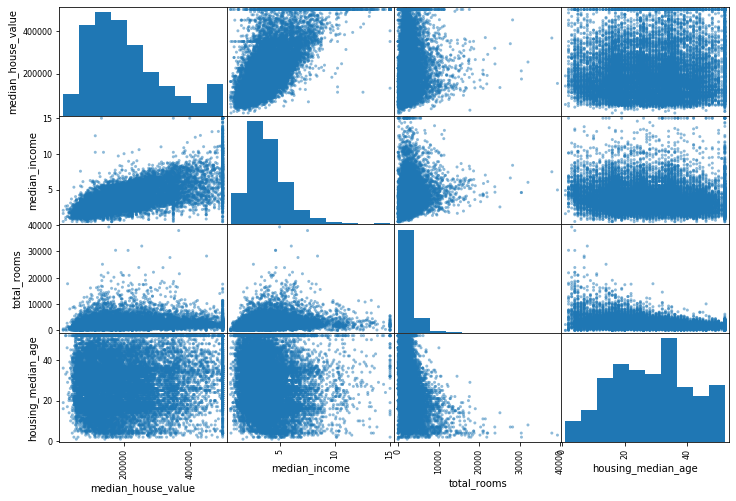

In [38]:
from pandas.plotting import scatter_matrix

# 这里仅绘制与房价中位数属性最相关的几个属性
attrs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(frame=housing[attrs], figsize=(12,8))
plt.show()
# 斜对角线绘制的是每个属性的直方图

接下来，我们关注其中的 房价中位数-收入中位数 相关性散点图

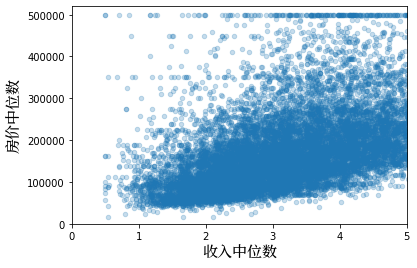

In [39]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.25)
plt.axis([0, 5, 0, 520000])
plt.xlabel('收入中位数', fontproperties=my_font)
plt.ylabel('房价中位数', fontproperties=my_font)
plt.show()

我们可以观察到整体呈上升趋势，且点不是很分散

## 实验不同的属性组合 Experimenting with Attribute Combinations Prepare 

尝试各种属性的组合，研究房价中位数与其相关性。例如：
1. 一个家庭的房间数量  rooms_per_household
2. 卧式/房间比   bedrooms_per_room
3. 每个家庭的人口数  population_per_household

In [40]:
housing["※rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["※bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["※population_per_household"]=housing["population"]/housing["households"]

In [41]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
※rooms_per_household         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
※population_per_household   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
※bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

可以观察到新属性`bedrooms_per_room` 相关性比较高 ，即卧式/房间比越低，房价往往更高

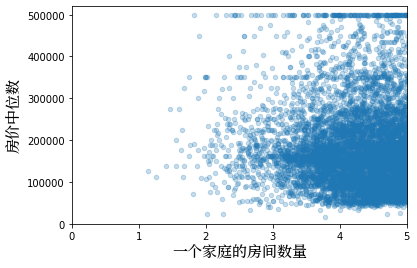

In [42]:
housing.plot(kind='scatter', x='※rooms_per_household', y='median_house_value', alpha=0.25,)
plt.axis([0, 5, 0, 520000])
plt.xlabel('一个家庭的房间数量', fontproperties=my_font)
plt.ylabel('房价中位数', fontproperties=my_font)
plt.show()

可以观察到新属性`rooms_per_household` 相关性比较高 ，即一个家庭的房间数量越多，房价往往更高

# 机器学习算法的数据准备 Prepare the data for Machine Learning algorithms

创建副本，而不损害训练集。同时我们需要将预测器和标签分开！

In [43]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()
housing_label.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

## 数据清理 Data Cleaning

In [44]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


我们注意到`total_bedrooms`有部分值丢失。有以下三种解决方法：
1. 放弃这些相映的区域
2. 放弃整个属性 
3. 将缺失的值设置为某个值（0，平均值或中位数等）

使用`Scikit-Learn`的`SimpleImputer`处理缺失值(P64)

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
# 1. 创建SimpleImputer实例 指定中位数策略（strategy）去填充空值
impute = SimpleImputer(strategy="median")

In [47]:
# 2. 由于中位数是数值计算 因此需要排除ocean_proximity列
housing_num = housing.drop("ocean_proximity", axis=1)

In [48]:
# *3. 将imputer实例适配到所有训练数据 并进行比对确认
impute.fit(housing_num)

impute.statistics_, housing_num.median().values

(array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
         408.    ,    3.5409]),
 array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
         408.    ,    3.5409]))

In [49]:
# *4. 进行缺失替换 并将其放到数据集中
X = impute.transform(housing_num)
housing_tr = pd.DataFrame(data=X, columns=housing_num.columns, index=housing_num.index)

In [50]:
# 5. 快捷方法：整合步骤3，4
X = impute.fit_transform(housing_num)
housing_tr = pd.DataFrame(data=X, columns=housing_num.columns, index=housing_num.index)

In [51]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


## 处理文本和分类属性 Handling Text and Categorical Attributes

`ocean_proximity`是文本类型，因此我们需要转化为数字类型。

In [52]:
housing_text = housing[['ocean_proximity'] ]
housing_text.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [53]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

使用`Scikit-Learn`的`OrdinalEncoder`将分类型变量转化成数值型索引变量

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
ordinal_encoder = OrdinalEncoder()
housing_text_encoder = ordinal_encoder.fit_transform(housing_text)
housing_text_encoder[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [56]:
ordinal_encoder.categories_  # 获取类别列表

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

为了解决属性之间的相似度的问题，我们采用`One-Hot 编码` 具体原理详见`NG机器学习-ex4神经网络-3.1.1 One-Hot编码`

In [57]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()  # sparse=False 指定编码格式不执行toarray()
housing_text_onehot = onehot_encoder.fit_transform(housing_text)
housing_text_onehot # 输出稀疏矩阵 有利于存储

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [58]:
onehot_encoder.categories_  # 获取类别列表

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转化器 Custom Transformers

`Scikit-Learn`依赖于鸭子类型编译，因此只需要创建一个类，然后运用以下的三种方法：
1. `fit()`
2. `transform()`
3. `fit_transform()`

添加`TransformerMixin`作为基类，会直接得到`fit_transform()`方法；

添加`BaseEstimator`作为基类，可以获得两个自动调整超参数的方法：`get_params()`和`set_params()`

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 特征缩放 Feature Scaling

同比例缩放有数属性的两种常用方法是`最小化-最大缩放`和`标准化`

- `最小化-最大缩放`:将值减去最小值，并除以最大值和最小值的差。使其范围最终归于0~1之间。使用`MinMaxScaler`转化器

- `标准化`:该方法受异常值的影响更小。使用`StandadScaler`转化器
    
    `Scikit-Learn`的`StandardScaler`类实现数据标准化
>$$
{{x}_{i}}=\frac{{{x}_{i}}-{{\mu}_{i}}}{S_n}
$$

## 转换流水线 Transformation Pipelines

`Scikit-Learn`的`Pipeline`类实现以正确的顺序执行数据转换

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),   # 数据清理 处理缺失值
        ('attribs_adder', CombinedAttributesAdder()),    # 添加处理后的属性
        ('std_scaler', StandardScaler()),                # 特征缩放 标准化
    ])

# 处理数值列
housing_num_tr = num_pipeline.fit_transform(housing_num) 

`Scikit-Learn`的`ColumnTransformer`类实现的效果会更好

In [61]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)         # 获取数值列列表
text_attribs = ["ocean_proximity"]      # 获取类别列列表

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("text", OneHotEncoder(), text_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)  
# 将每一个转换器运用于适当的列，并沿第二个轴合并输出

当稀疏矩阵和密集矩阵混合在一起时，`ColumnTransformer`估算最终矩阵的密度（单元格的非零比例）。如果密度低于给定的阈值，则返回一个稀疏矩阵。

# 选择和训练模型 Select and train a model¶

## 训练和评估训练集 Training and Evaluating on the Training Set

> - housing_prepared 训练集
- housing_label    标签

### 线性回归模型 Linear Regression

1. 首先训练一个线性回归模型

In [62]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

2. 尝试用几个训练集实例测试下

In [63]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


3. 测试

In [64]:
test_data = housing.iloc[:5]
test_label = housing_label.iloc[:5]
# 执行转换流水线
test_data_prepared = full_pipeline.transform(test_data)

3. 比对预测值和标签值

In [65]:
print("预测值:", lin_model.predict(test_data_prepared)),
print("标签值:", list(test_label))

预测值: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
标签值: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


4. 计算`RMSE`和`MAE`

In [66]:
housing_predictions = lin_model.predict(housing_prepared)

利用`Scikit-Learn`的`mean_squared_error()`函数测量整个训练集回归模型的`均方根误差RMSE`：

>Root Mean Square Error (RMSE):
$$
\operatorname{RMSE}(\mathbf{X}, h)=\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right)^{2}}
$$

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
def RMSE(y_true, y_pred):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return RMSE

In [69]:
lin_RMSE = RMSE(y_true=housing_label, y_pred=housing_predictions)
lin_RMSE

68628.19819848922

经典的预测误差达到68711，表现差强人意。这是一个典型的模型对训练数据欠拟合的案例。

利用`Scikit-Learn`的`mean_absolute_error()`函数测量整个训练集回归模型的`平方绝对误差MAE`：

>Mean absolute error (MAE):
$$
\operatorname{MAE}(\mathbf{X}, h)=\frac{1}{m} \sum_{i=1}^{m}\left|h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right|
$$

In [70]:
from sklearn.metrics import mean_absolute_error

In [71]:
lin_MAE = mean_absolute_error(y_true=housing_label, y_pred=housing_predictions)
lin_MAE

49439.89599001897

### 决策树模型 Decision Tree

- `Scikit-Learn`的`DecisionTreeRegressor()`函数实现决策树回归

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

- 计算`RMSE`

In [74]:
housing_predictions = tree_model.predict(housing_prepared)
tree_RMSE = RMSE(y_true=housing_label, y_pred=housing_predictions)
tree_RMSE

0.0

误差为0？可能出现了模型对数据过拟合

### 随机森林模型 Random Forest

随机森林的原理：通过对特征的随机子集进行许多个决策树训练，然后对其预测取平均值。

- 利用`Scikit-Learn`的`RandomForestRegressor()`函数实现随机森林回归

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(housing_prepared, housing_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

- 计算`RMSE`

In [77]:
housing_predictions = forest_model.predict(housing_prepared)
forest_RMSE = RMSE(y_true=housing_label, y_pred=housing_predictions)
forest_RMSE

18603.515021376355

### 支持向量回归模型 Support Vector Regression

支持向量机(SVM)本身是针对二分类问题提出的，而SVR（支持向量回归）是SVM（支持向量机）中的一个重要的应用分支。SVR回归与SVM分类的区别在于，SVR的样本点最终只有一类，它所寻求的最优超平面不是SVM那样使两类或多类样本点分的“最开”，而是使所有的样本点离着超平面的总偏差最小。
> - SVM是要使到超平面最近的样本点的“距离”最大
- SVR是要使到超平面最远的样本点的“距离”最小

- 利用`Scikit-Learn`的`SVR()`函数实现支持向量回归

In [78]:
from sklearn.svm import SVR

In [79]:
svr_model = SVR(kernel="linear")
svr_model.fit(housing_prepared, housing_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
housing_predictions = svr_model.predict(housing_prepared)
svr_RMSE_linear = RMSE(y_true=housing_label, y_pred=housing_predictions)
svr_RMSE_linear

111094.6308539982

## 使用交叉验证集来更好的进行评估 Better Evaluation Using Cross-Validation


评估模型的方法：
1. 利用`Scikit-Learn`中的`train_test_split()`函数 将训练集分为较小的训练集和验证集，然后根据这些较小的训练集。来训练模型并对其进行评估。
2. 利用`Scikit-Learn`中的`cross_val_score()`函数 实现`K折验证交叉验证`

In [81]:
from sklearn.model_selection import cross_val_score

> **K折验证交叉验证**
1. 首先，将全部样本划分成k个大小相等的样本子集；
2. 依次遍历这k个子集，每次把当前子集作为验证集，其余所有样本作为训练集，进行模型的训练和评估；
3. 最后把k次评估指标的平均值作为最终的评估指标。在实际实验中，k通常取10.

In [82]:
def display_scores(scores, RMSE):
    print("评分集:", scores)
    print("标准差:", scores.std())
    print("平均评分:", scores.mean())
    print("训练集整体RMSE:", RMSE)

1. 评估决策树模型

In [83]:
def cv_score(model):
    scores = cross_val_score(estimator=model,        # 需要使用交叉验证的算法
                             X=housing_prepared,     # 输入样本数据
                             y=housing_label,        # 样本标签
                             scoring="neg_mean_squared_error",   # 选择交叉验证的验证方式:MSE
                             cv=10                   # 交叉验证折数或可迭代的次数
                            )
    RMSE_scores = np.sqrt(-scores)
    return RMSE_scores

In [84]:
tree_RMSE_scores = cv_score(model=tree_model)
print(tree_RMSE_scores)

[70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]


`Scikit-Learn`中交叉验证功能更倾向于使用`效能函数`(越大越好)，而不是`成本函数`，所以使用负的MSE。

In [85]:
display_scores(tree_RMSE_scores, tree_RMSE)

评分集: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
标准差: 2439.4345041191004
平均评分: 71407.68766037929
训练集整体RMSE: 0.0


2. 评估线性回归模型

In [86]:
lin_RMSE_scores = cv_score(model=lin_model)
display_scores(lin_RMSE_scores, lin_RMSE)

评分集: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
标准差: 2731.674001798348
平均评分: 69052.46136345083
训练集整体RMSE: 68628.19819848922


可以发现决策树模型与线性回归模型表现相比要更差，过拟合问题严重

3. 评估随机森林模型

In [87]:
forest_RMSE_scores = cv_score(model=forest_model)
display_scores(forest_RMSE_scores, forest_RMSE)

评分集: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
标准差: 2097.0810550985693
平均评分: 50182.303100336096
训练集整体RMSE: 18603.515021376355


对比起来使用随机森林模型效果更好，但是该模型仍然对训练集过拟合。

4. 评估SVR模型

In [88]:
svr_RMSE_scores = cv_score(model=svr_model)
display_scores(svr_RMSE_scores, svr_RMSE_linear)

评分集: [105342.09141998 112489.24624123 110092.35042753 113403.22892482
 110638.90119657 115675.8320024  110703.56887243 114476.89008206
 113756.17971227 111520.1120808 ]
标准差: 2762.393664321567
平均评分: 111809.84009600841
训练集整体RMSE: 111094.6308539982


# 微调模型 Fine-tune your model

## 网格搜索 Grid Search

微调的方法：
1. 手动调整超参数
2. 利用`Scikit-Learn`中的`GridSearchCV()`函数 实现网格搜索

In [89]:
from sklearn.model_selection import GridSearchCV

以寻找`RandomForestRegressor()`(随机森林回归6.1.3)的超参数数值的最佳组合为例：

In [90]:
# 指定需要进行实验的超参数以及需要尝试的数值
param_grid = [
    # 尝试 12 (3×4) 种超参数组合
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 尝试 6 (2×3) 种超参数组合, bootstrap 设置为 False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

使用交叉验证来评估超参数的所有可能组合

In [91]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
grid_search = GridSearchCV(estimator=forest_model,   
                           param_grid=param_grid,     # 需要最优化的参数的取值
                           scoring="neg_mean_squared_error",
                           cv=5,
                           return_train_score=True,    # cv_results_属性将是否包含训练分数
                           n_jobs=-1
                          )
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
       

由于cv=5，即使用5折交叉验证，则网格搜索将进行90 [5×(12+6)]次训练

- 获取最佳的参数组合：

In [92]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

- 获取最佳的估算器：

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

- 获取评估分数： 使用网格搜索探索18种组合

In [94]:
scores = grid_search.cv_results_
for mean_score, params in zip(scores["mean_test_score"], scores["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

`49682.25345942335 {'max_features': 8, 'n_estimators': 30}`评估分数最低，RMSE为49 682，低于默认的50 182 

因此，我们得到的最佳解决方案是超参数`max_features`=8,`n_estimators`=30

## 随机搜索 Randomized Search

微调的方法：
3. 利用`Scikit-Learn`中的`RandomizedSearchCV()`函数 实现随机搜索

如果探索的组合数比较少，那么网格搜索是一种不错的方法。但是当超参数的搜索范围较大时，通常优先选择随机搜索。

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(estimator=forest_model, 
                                param_distributions=param_distribs,
                                n_iter=10,   # 指定训练次数
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=42,
                                n_jobs=-1
                               )
rnd_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [96]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [97]:
scores = rnd_search.cv_results_
for mean_score, params in zip(scores["mean_test_score"], scores["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


`49150.657232934034 {'max_features': 7, 'n_estimators': 180}`评估分数最低，RMSE为49 150，低于默认的50 182 

## 集成方法 Ensemble Methods

微调的方法：
4. 集成方法：将表现最优的模型组合起来。

## 分析最佳模型及其误差 Analyze the Best Models and Their Errors

通过检查最佳模型，你总是可以得到一些好的洞见。

- 获取每个属性的重要程度

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

- 标注属性名称

In [99]:
# 获取数值列列表
num_attribs = list(housing_num)  
# 添加不同的属性组合
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# 执行转换流水线-指定处理分类属性-获取分类属性
cat_encoder = full_pipeline.named_transformers_["text"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [100]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

有了这些信息，就可以尝试删除一些不太有用的特征

然后你应该查看一下系统产生的具体错误，尝试了解他们是怎么产生的，以及该怎么解决，通过添加额外的特征，删除没用的特征，清除异常值等。

## 通过测试集评估系统 Evaluate Your System on the Test Set

In [101]:
# 1. 指定模型-经过参数微调后的决策树模型估算器
finial_model = grid_search.best_estimator_

# 2. 获取测试集预测器和标签
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 3. 对数据进行处理-转换流水线
X_test_prepared = full_pipeline.transform(X_test)

# 4. 根据模型进行预测
final_predictions = finial_model.predict(X_test_prepared)

# 5. 计算`RMSE`
final_MSE = mean_squared_error(y_pred=final_predictions, y_true=y_test)
final_RMSE = np.sqrt(final_MSE)
final_RMSE

47730.22690385927

我们可以计算测试`RMSE`的95％置信区间,以获取估计的精准度

- 利用`Scipy`中的`stats.t.interval()`函数 计算置信区间

In [102]:
from scipy import stats

confidence = 0.95   # 95％置信区间
squared_errors = (final_predictions -  y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

如果之前进行过大量的超参数调整，证实的评估结果通常会略逊于你之前使用交叉验证时的表现结果。虽然上例中并非如此

# 启动、监控和维护你的系统 Launch, Monitor, and Maintain Your System

## 具有数据准备和预测的完整管道 A full pipeline with both preparation and prediction

In [103]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),  # 管道嵌套
        ("linear", LinearRegression())   # 训练线性回归模型
    ])

full_pipeline_with_predictor.fit(housing, housing_label)
full_pipeline_with_predictor.predict(test_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## 模型持久性 Model persistence 

利用`joblib`库 保存训练好的模型

In [104]:
model = full_pipeline_with_predictor

In [105]:
import joblib
joblib.dump(model, 'model.pkl')            # 模型保存

model_loaded = joblib.load('model.pkl')    # 模型从本地调回

In [106]:
model_loaded.predict(test_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

# 练习题 Exercise

## ex. 1

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

- 使用不同的超参数实现支持向量回归

In [107]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', gamma='auto')   # C超参数与gamma超参数的各种值

svm_model.fit(housing_prepared, housing_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [108]:
housing_predictions = svm_model.predict(housing_prepared)
svm_RMSE_rbf = RMSE(y_pred=housing_predictions, y_true=housing_label)

In [109]:
print("linear:",svr_RMSE_linear,"\nrbf:",svm_RMSE_rbf)

linear: 111094.6308539982 
rbf: 118577.43356412371


- 利用网格搜索微调模型

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = [
        {    
            'kernel': ['linear'], 
            'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]
        },
        {
            'kernel': ['rbf'], 
            'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
            'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
        },
    ]
# 尝试 8(1*8) + 42(1*7*6)种超参数组合

In [112]:
svm_model = SVR()   # C超参数与gamma超参数的各种值

grid_search = GridSearchCV(estimator=svm_model, 
                           param_grid=param_grid, 
                           scoring="neg_mean_squared_error",
                           cv=5,
                           verbose=2,  # verbose：日志冗长度
                           n_jobs=-1   # 表示占用所有cpu开线程
                          )
grid_search.fit(housing_prepared, housing_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

- 计算`RMSE`

In [113]:
housing_predictions = grid_search.predict(housing_prepared)
svm_RMSE_rbf = RMSE(y_pred=housing_predictions, y_true=housing_label)

In [114]:
print("linear:",svr_RMSE_linear,"\nrbf:",svm_RMSE_rbf)

linear: 111094.6308539982 
rbf: 70160.01879316564


- 获取最佳的参数组合：

In [115]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

结果分析，核函数选择`linear`内核似乎比`RBF`内核更好。 

请注意，C的值是最大测试值。 当发生这种情况时，您肯定希望再次启动网格搜索，以更高的C（删除最小值），因为它可能会更好的C值。

## ex. 2

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

- 利用随机搜索微调模型

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [117]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),   # 当核函数为linear时，忽略gamma参数
    }
# 尝试 8(2*8) + 42(1*7*6)种超参数组合

In [118]:
svm_reg = SVR()
rnd_search = RandomizedSearchCV(estimator=svm_model, 
                                param_distributions=param_distribs,
                                n_iter=50, 
                                cv=5, 
                                scoring='neg_mean_squared_error',
                                verbose=2, 
                                random_state=42,
                                n_jobs=-1
                               )
rnd_search.fit(housing_prepared, housing_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe0ff570d50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe0ff570c10>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

- 计算`RMSE`

In [119]:
housing_predictions = rnd_search.predict(housing_prepared)
rnd_RMSE = RMSE(y_pred=housing_predictions, y_true=housing_label)
print(rnd_RMSE)

48466.43210046259


- 获取最佳的参数组合：

In [120]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

结果分析，我们找到了一组核函数选择rbf内核下的最佳参数组合。

随机搜索倾向于在相同的时间内找到比网格搜索更好的近似数目。 


## ex. 3

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

- 自定义转换器：选出最重要的属性

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

1. 定义需要保留的最重要属性的数量

In [122]:
 k = 5

2. (参考7.4)获取每个属性的重要程度

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_

3. (参考7.4)标注属性名称

In [125]:
# 获取数值列列表
num_attribs = list(housing_num)  
# 添加不同的属性组合
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# 执行转换流水线-指定处理分类属性-获取分类属性
cat_encoder = full_pipeline.named_transformers_["text"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [126]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),

 (0.16478099356159054, 'INLAND'),
 
 (0.10879295677551575, 'pop_per_hhold'),
 
 (0.07334423551601243, 'longitude'),
 
 (0.06290907048262032, 'latitude'),
 
 (0.056419179181954014, 'rooms_per_hhold'),
 
 (0.053351077347675815, 'bedrooms_per_room'),
 
 (0.04114379847872964, 'housing_median_age'),
 
 (0.014874280890402769, 'population'),
 
 (0.014672685420543239, 'total_rooms'),
 
 (0.014257599323407808, 'households'),
 
 (0.014106483453584104, 'total_bedrooms'),
 
 (0.010311488326303788, '<1H OCEAN'),
 
 (0.0028564746373201584, 'NEAR OCEAN'),
 
 (0.0019604155994780706, 'NEAR BAY'),
 
 (6.0280386727366e-05, 'ISLAND')]

4. 获取最重要的属性

In [127]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [128]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [129]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

与步骤3的结果进行确认无误

5. 创建转换流水线 包含选取最重要属性

In [130]:
from sklearn.pipeline import Pipeline

full_pipeline_with_selection = Pipeline([
        ('preparation', full_pipeline),  
        ('selection', TopFeatureSelector(feature_importances,k)),   
    ])

housing_prepared_k_features = full_pipeline_with_selection.fit_transform(housing) 

6. 测试实例

In [131]:
housing_prepared_k_features[:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

7.(参考5.5)对比确认

In [132]:
housing_prepared[:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

## ex. 4

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

- 建立覆盖完整数据准备和最终预测的流水线

In [133]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [134]:
k = 5
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),   # 数据准备 (参考5.5)
    ('selection', TopFeatureSelector(feature_importances, k)),   # 选取重要参数(参考9.3)
    ('svm_model', SVR(**rnd_search.best_params_))   # 建立SVR模型 使用随机搜索微调模型(参考9.2)
])

In [136]:
prepare_select_and_predict_pipeline.fit(housing, housing_label)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

- 测试

In [137]:
test_data = housing.iloc[:4]
test_label = housing_label.iloc[:4]

In [138]:
print("Predictions:\t", prepare_select_and_predict_pipeline.predict(test_data))
print("Labels:\t\t", list(test_label))

Predictions:	 [203214.28978849 371846.88152572 173295.65441612  47328.3970888 ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


流水线似乎工作正常。 当然，预测不是很棒：如果我们使用我们之前发现的最佳随机森林回归主，而不是SVR，表现会更好。

> Apotosome 06/30/21